In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

In [0]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [11]:
print('train data set has got {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('test data set has got {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))

train data set has got 300000 rows and 25 columns
test data set has got 200000 rows and 24 columns


In [0]:
#drop the nonsense features
df_train = df_train.drop(['nom_5','nom_6','nom_7','nom_8','nom_9'] , axis = 1)


In [12]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [0]:
df_train.info()

In [0]:
X=df_train.drop(['target'],axis=1)
y=df_train['target']

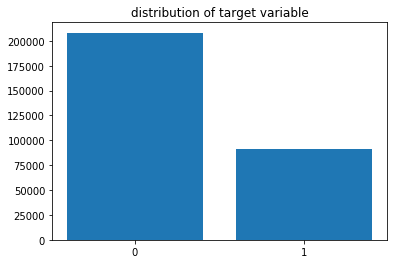

In [14]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

Label Encoder:-

In [0]:
from sklearn.preprocessing import LabelEncoder

In [16]:
train=pd.DataFrame()
label=LabelEncoder()
for c in  X.columns:
    if(X[c].dtype=='object'):
        train[c]=label.fit_transform(X[c])
    else:
        train[c]=X[c]
        
train.head() 

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,0,78,120,491,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,2,159,510,260,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,3,44,14,766,1932,8078,1,1,4,7,17,31,7,2
3,3,0,1,0,0,1,2,4,5,0,1,209,165,1121,629,6056,1,2,0,8,3,134,2,1
4,4,0,0,0,0,0,2,4,4,0,1,90,61,34,1760,8231,1,2,2,0,17,158,7,8


Logistic Regression

In [0]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    print('Accuracy : ',accuracy_score(y_test,y_pre))


In [18]:
logistic(train,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.6889166666666666


*One Hot Encoding

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [20]:

one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316461 columns


In [21]:
logistic(train,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.7594


Feature Hashing

In [0]:
from sklearn.feature_extraction import FeatureHasher

In [0]:
X_train_hash=X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')      
hashing=FeatureHasher(input_type='string')
train=hashing.transform(X_train_hash.values)

In [25]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 1048576 columns


In [26]:
logistic(train,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.7512333333333333


Cyclic features


In [27]:
X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos']].head()

,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000
3,9.749279e-01,-0.222521
4,-2.449294e-16,1.000000


In [28]:
one=OneHotEncoder()
one.fit(X_train_cyclic)
train=one.transform(X_train_cyclic)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316478 columns
train data set has got 300000 rows and 316478 columns


In [29]:
logistic(train,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.75935


Target Encoding


In [0]:
X_target=df_train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values

In [36]:
X_target.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,0.237743,2,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432,0
1,1,0,1,0,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,0.304164,1,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496,0
2,2,0,0,0,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,0.353951,1,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432,0
3,3,0,1,0,0.309384,0.290107,0.351052,0.290054,0.307162,0.339793,0.329472,1,0.403885,0.360961,0.330148,0.208354,0.355985,0.322048,0.255729,1
4,4,0,0,0,0.309384,0.333773,0.351052,0.290054,0.293085,0.339793,0.329472,1,0.403885,0.225214,0.206599,0.351864,0.404345,0.340292,0.327496,0


In [37]:
new_X = X_target.drop('target',axis=1)
logistic(new_X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.6946166666666667
